### Continuous Time Markov Chain Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm 

In [2]:
# Define transition matrix, and initial state probability vector.
t = 1.0  
Q = np.array([[-1, 1], [2, -2]])  # Infinitesimal generator matrix.
pi_0 = np.array([0.5, 0.5])  # Initial state probability vector.


In [3]:

def CTMC_StateProba(t, Q, pi_0):
    """
    Calculate the state probabilities of a Continuous-Time Markov Chain (CTMC) at time 't'.

    Parameters:
    t (float): The time at which to calculate state probabilities.
    Q (numpy.ndarray): The infinitesimal generator matrix of the CTMC.
    pi_0 (numpy.ndarray): The initial state probability vector.

    Returns:
    numpy.ndarray: The state probabilities at time 't'.
    """
    # Initialize state probability vector at time 0.
    pi_t = pi_0

    # Calculate state probabilities at time t using the matrix exponential.
    pi_t = np.matmul(pi_t, expm(Q * t))

    return pi_t


In [4]:
# Call the CTMC_StateProba function to calculate state probabilities at time 't'.
state_probabilities = CTMC_StateProba(t, Q, pi_0)

# Print 
print(state_probabilities)

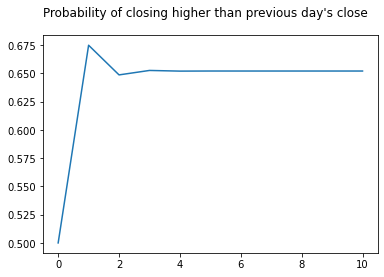

In [7]:
# Create a bar plot to visualize state probabilities.
states = range(len(state_probabilities))
plt.bar(states, state_probabilities, tick_label=states)
plt.xlabel('State')
plt.ylabel('Probability')
plt.title(f'State Probabilities at time {t}')
plt.show()

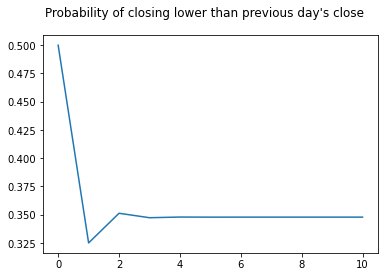

In [8]:
#plot pi_1t = P(X_t = +1) versus t
fig = plt.figure()
fig.suptitle('Probability of closing lower than previous day\'s close')
plt.plot(range(len(PT)),PT[:,1])
plt.show()

# Simulation of DTMC :
##### Simulate a realization of a DTMC in 365 days

In [9]:
PT[0][0]

0.5

In [10]:
# the number of the states we want to generate
TimeSteps = 365
# choose the closing stock price to be 315 $
closing_price=100
#intitialize state proba
p_0 =np.array([0.5,0.5])

K=np.array([[0.6,0.4],[0.75,0.25]])

In [11]:
closing_prices=[closing_price]
for i in range(1,TimeSteps+1):
    #Simulate a Uniform RV at each time step 
    U =np.random.rand(0,1)
    pi_t=DTMC_StateProba(i,K,p_0)
    #Choose the percentage delta of change in closing price upon increase or decrease
    delta = np.random.rand()*2
    if  U<= pi_t[i][0]:
        closing_price_t = closing_price*(100+delta)/100
        print(closing_price_t)
    else:
        closing_price_t = closing_price*(100-delta)/100
    closing_prices.append(closing_price_t)

<ipython-input-11-3239f11ac40f>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if  U<= pi_t[i][0]:


In [12]:
CP=np.array(closing_prices)

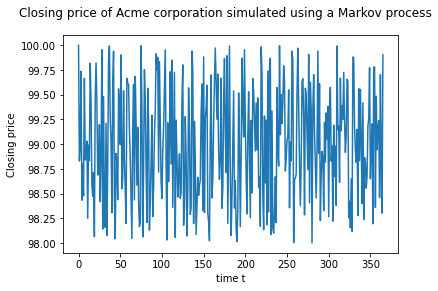

In [13]:
#plot all the accumulated closing prices
fig = plt.figure()
fig.suptitle('Closing price of Acme corporation simulated using a Markov process')
plt.xlabel('time t')
plt.ylabel('Closing price')
plt.plot(range(TimeSteps+1), CP)
plt.show()
